In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [74]:
data = pd.read_csv('../performance_measurements.csv')
data.loc['mean'] = data.mean(axis=0).round().astype(int)
# " (ms)"-Endung aus den Spaltennamen entfernen
data.columns = [col.replace(" (ms)", "") for col in data.columns]

# Sinus-Messerte werden temporär entfernt
# TODO: Das hier entfernen
for col in data:
    if col.endswith('sinus'):
        data.drop(col, axis=1, inplace=True)

data

,fourThreads_linear,twoThreads_constant,largeCuboid_constant,standard_linear,twoThreads_linear,fourThreads_constant,standard_constant,largeCuboid_linear,threeThreads_constant,smallCuboid_constant,threeThreads_linear,fiveThreads_linear,fiveThreads_constant,smallCuboid_linear
0,83,95,89027,2701,39,236,3956,85609,6,433,42,8,37,308
1,63,43,87655,1990,47,39,1773,88420,6,495,25,200,67,359
2,135,18,88117,1891,112,199,1870,87596,14,215,133,50,101,210
mean,94,52,88266,2194,66,158,2533,87208,9,381,67,86,68,292


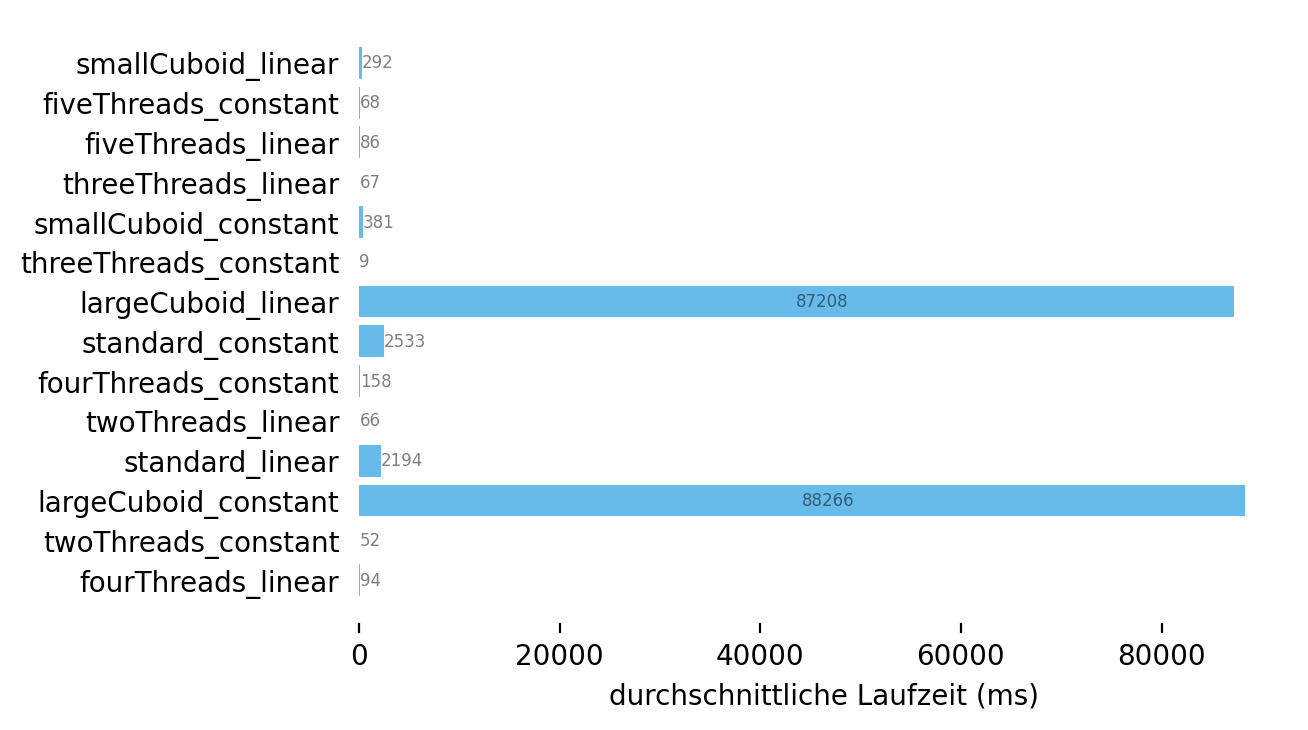

In [75]:
from matplotlib.text import Text, _get_textbox
from matplotlib.patches import Rectangle
from matplotlib.axes import Axes

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)

# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=6)
    text_width_in_display_units = text.get_window_extent(renderer=fig.canvas.get_renderer()).width
    text_width_in_data_units = ax.transData.transform((text_width_in_display_units,0))[0]
    # Der Text steht entweder rechts des Balkens wenn der Balken schmaler ist als der Text,
    # oder mittig im Balken, wenn der Balken breiter ist als der Text.
    x_pos = rect.get_width() if rect.get_width() <=text_width_in_data_units else rect.get_width()/2
    text.set_x(x_pos)
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [ ]:
fig.savefig('measurements.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')